# Compare parameter variations for $\zeta$ Ophiuchi
author: [Mathieu Renzo](mrenzo@flatironinstitute.org)

In [1]:
import sys
# the line below import stuff from git@github.com:mathren90/plotFunc.git
sys.path.append('/mnt/home/mrenzo/codes/python_stuff/plotFunc/')
from MESAreader import *
import matplotlib.pyplot as plt
from plotDefaults import *
# plot_aux defines many auxiliary functions to make plots
from plot_aux import *

In [7]:
set_plotDefaults()

done in plotDefaults.py


In [2]:
root = "/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01/"
root_variation = root+"/no_do_adjust_Jdot/binary_to_postRLOF/"
root_fiducial = root+"/re-run_exponential/binary_to_postRLOF"

... Binary file does not yet exist
... let me scrub this for you


Data in /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01//no_do_adjust_Jdot/binary_to_postRLOF//LOGS2/history.data has been scrubbed.
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01//no_do_adjust_Jdot/binary_to_postRLOF//LOGS2/history.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


... Binary file does not yet exist
... let me scrub this for you


Data in /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01//no_do_adjust_Jdot/binary_to_postRLOF//binary_history.data has been scrubbed.
...    reading ascii file  /mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01//no_do_adjust_Jdot/binary_to_postRLOF//binary_history.data
...    and storing it for you in binary format
...    patience please, next time will be way faster 
...    I promise


Text(0, 0.5, '$\\log_{10}(L/L_\\odot)$')

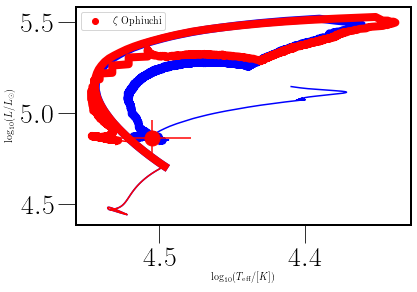

In [3]:
fig = plt.figure()
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[:,:])


# fiducial
hfile1 = root_fiducial+"/LOGS2/history.data"
hfile2 = root_fiducial+"/../accretor_to_TAMS/LOGS/history.data"
bfile = root_fiducial+"/binary_history.data"
plot_HRD(ax, hfile1=hfile1, c="b", hfile2=hfile2, bfile=bfile)

# variations
hfile1 = root_variation+"/LOGS2/history.data"
hfile2 = "" #root_fiducial+"/../accretor_to_TAMS/LOGS/history.data"
bfile = root_variation+"/binary_history.data"
plot_HRD(ax, hfile1=hfile1, c="r", hfile2=hfile2, bfile=bfile)

zeta_oph_HRD(ax)
ax.plot(np.nan,np.nan, "ro",label=r"$\zeta \ \mathrm{Ophiuchi}$" )
ax.legend()
ax.invert_xaxis()
ax.set_xlabel(r"$\log_{10}(T_\mathrm{eff}/ [K])$")
ax.set_ylabel(r"$\log_{10}(L/L_\odot)$")


/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01//re-run_exponential/binary_to_postRLOF
/mnt/home/mrenzo/RUNS/zeta_ophiuchi/M1_25_M2_17_P100_Z0.01//no_do_adjust_Jdot/binary_to_postRLOF/


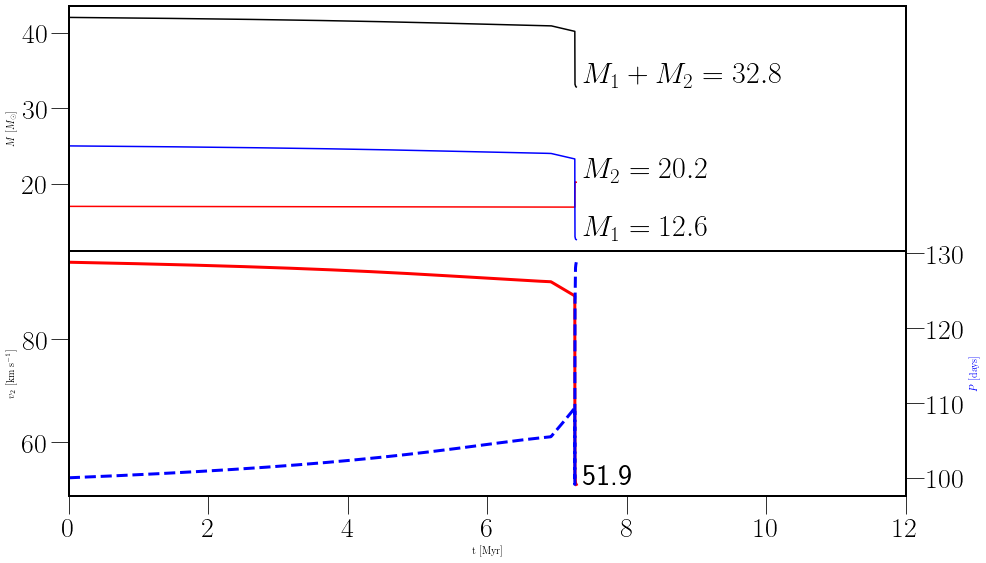

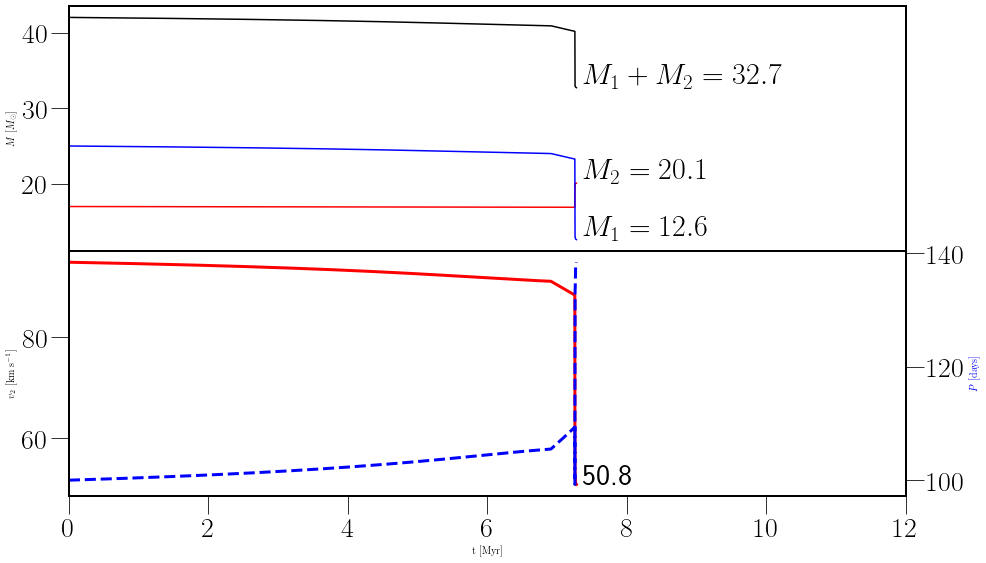

In [4]:
MassVelocityEvolution(root_fiducial, convert=False, figName="")
MassVelocityEvolution(root_variation, convert=False, figName="")

(-8.5, 0.3)

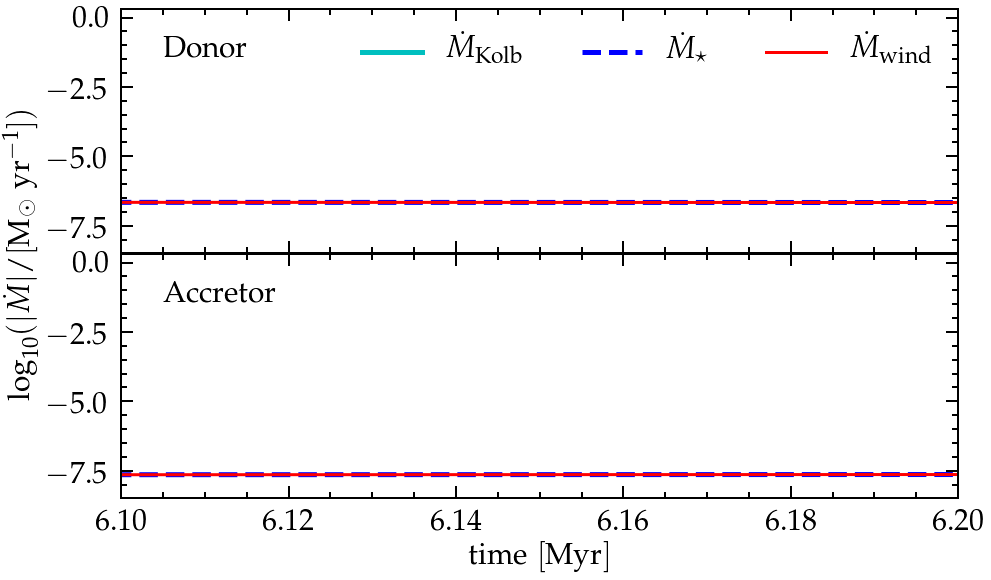

In [6]:
fig = plt.figure(figsize=(15,9))
gs = gridspec.GridSpec(100, 100)
ax = fig.add_subplot(gs[50:,:])
bx = fig.add_subplot(gs[:50,:])

bfile = root_variation+'/binary_history.data'
src, col = getSrcCol(bfile)
lg_mtransfer_rate = src[:, col.index('lg_mtransfer_rate')]
lg_mstar_dot_1 = src[:, col.index('lg_mstar_dot_1')]
lg_mstar_dot_2 = src[:, col.index('lg_mstar_dot_2')]
lg_system_mdot_1 = src[:, col.index('lg_system_mdot_1')]
lg_system_mdot_2 = src[:, col.index('lg_system_mdot_2')]
lg_wind_mdot_1 = src[:, col.index('lg_wind_mdot_1')]
lg_wind_mdot_2 = src[:, col.index('lg_wind_mdot_2')]
t = src[:, col.index("age")]*1e-6
# t = np.log10(t[-1]-t)

ax.plot(t, lg_mtransfer_rate, lw=5, c='c')
bx.plot(t, lg_mtransfer_rate, lw=5, c='c', label="$\dot M_\mathrm{Kolb}$")

ax.plot(t, lg_mstar_dot_2, lw=5, ls='--', c='b')
bx.plot(t, lg_mstar_dot_1, lw=5, ls='--', c='b', label="$\dot M_\star$")

ax.plot(t, lg_wind_mdot_2, c='r')
bx.plot(t, lg_wind_mdot_1, c='r', label=r"$\dot M_\mathrm{wind}$")

bx.legend(ncol=3)

ax.text(0.05,0.8, "$\mathrm{Accretor}$", fontsize=30, transform=ax.transAxes)
bx.text(0.05,0.8, "$\mathrm{Donor}$", fontsize=30, transform=bx.transAxes)

ax.set_ylabel(r"$\log_{10}(|\dot{M}|/\mathrm{[M_\odot \ yr^{-1}]})$",  horizontalalignment='center', y=1.)
#ax.set_xlim(xmin=5.72, xmax=5.74)
# ax.set_xlabel(r"$\log_{10}(t_\mathrm{end}-t \ \mathrm{[yr]})$")
ax.set_xlabel(r"$\mathrm{time} \ \mathrm{[Myr]}$")
bx.set_xlabel("")
bx.set_xticklabels([])
# ax.set_xlim(xmin=7.252, xmax=7.267)
ax.set_xlim(xmin=6.1, xmax=6.2)
ax.set_ylim(-8.5,0.3)
bx.set_xlim(ax.get_xlim())
bx.set_ylim(ax.get_ylim())


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  func(*args, **kwargs)


/mnt/home/mrenzo/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


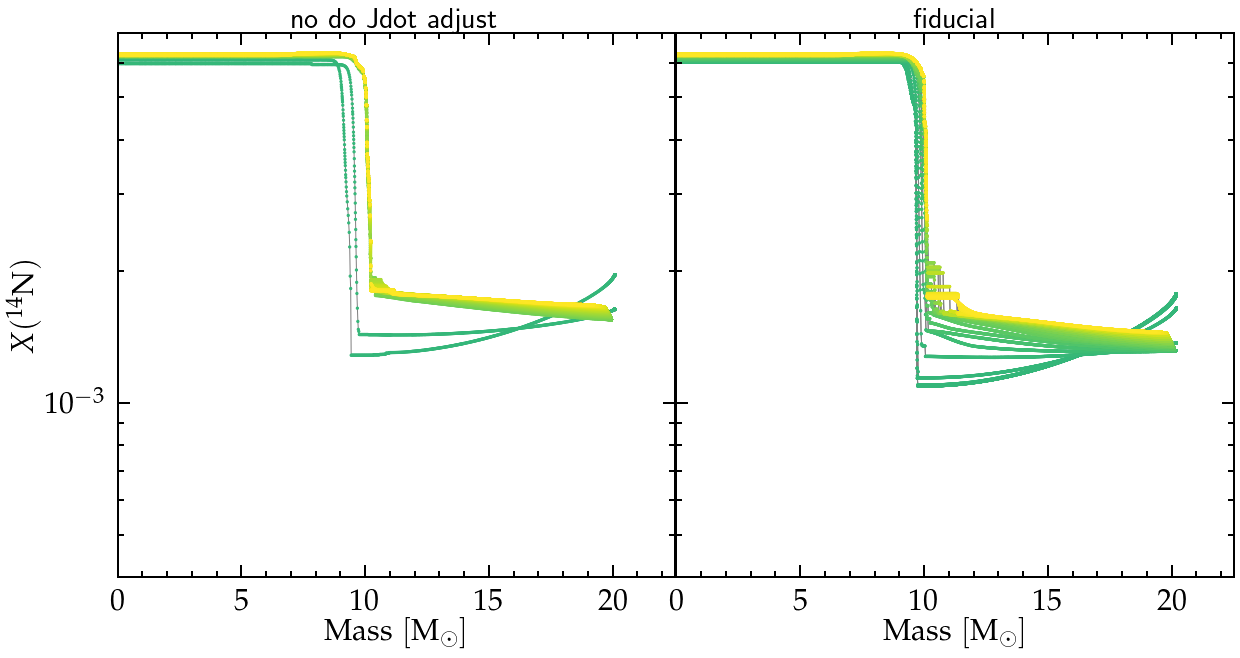

In [8]:
fig = plt.figure(figsize=(20,10))
gs = gridspec.GridSpec(100, 100)
ax1 = fig.add_subplot(gs[:, :50])
ax2 = fig.add_subplot(gs[:, 50:])

axes = [ax1, ax2]

ax1.set_ylabel(r"$X(^{14}\mathrm{N})$")

for ax in axes:
    ax.set_yscale('log')
    ax.set_ylim(ymax=7e-3, ymin=4e-4)
    # ax.set_facecolor('#d8d8d8')
    ax.set_xlim(xmin=0, xmax=22.5)
    ax.set_xlabel(r"$\mathrm{Mass \ [M_\odot]}$")
    
ax2.set_yticklabels([])

folders = [
    root_variation+"/../accretor_to_TAMS/LOGS/",
    root_fiducial+"/../accretor_to_TAMS/LOGS/"]
# root_fiducial+"/LOGS2/"]
ax1.set_title("no do Jdot adjust", size=30)
ax2.set_title("fiducial", size=30)

for folder in folders:
    ax = axes[folders.index(folder)]
    if folders.index(folder) == 0:
        profiles = sorted(glob.glob(folder+"/p*data"), key=get_age_from_profile)
    else:
        profiles = sorted(glob.glob(folder+"/p*data")+glob.glob(folder+'../../accretor_to_TAMS/LOGS/p*.data'), key=get_age_from_profile)
    for profile in profiles:
        src, col = getSrcCol(profile)
        n = src[:, col.index("n14")]
        m = src[:, col.index("mass")]
        age = get_age_from_profile(profile)
        ax.plot(m, n, c='#808080', lw=1, zorder=0)
        p = ax.scatter(m,n, c=[age]*len(n), s=5, vmin=0, vmax=11, rasterized=True)

